In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from glob import glob
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model

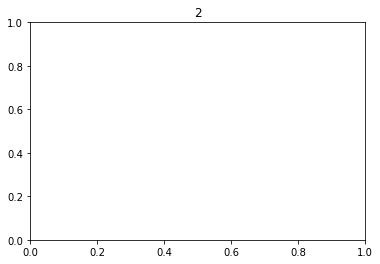

In [2]:
train_data_dir = os.path.join('C:\\Users\\Dell\\archive\\Rock-Paper-Scissors\\Rock-Paper-Scissors\\train')
test_data_dir = os.path.join('C:\\Users\\Dell\\archive\\Rock-Paper-Scissors\\Rock-Paper-Scissors\\test')
categories = ['rock', 'paper', 'scissors']
training_data=[]
testing_data = []
validation_data = []
img_size= 224

#val_dir= os.path.join('C:\Users\Dedeepya\Downloads\archive\Rock-Paper-Scissors\validation')

def data_labeling(data_path, data):
    for category in categories:
        label = categories.index(category)

        category_path = os.path.join(data_path, category)
        for img in os.listdir(category_path):
            img_path = os.path.join(category_path, img)
            img_array = cv2.imread(img_path)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB )
            img_array = cv2.resize(img_array, (img_size, img_size))
            #plt.imshow(img_array)
            plt.title(label)
            data.append([img_array, label])
data_labeling(train_data_dir, training_data)
data_labeling(test_data_dir, testing_data)

In [3]:
X_train=[]
Y_train=[]
X_test=[]
Y_test=[]
for features, labels in training_data:
    X_train.append(features)
    Y_train.append(labels)  
X_train=np.array(X_train)
Y_train=np.array(Y_train)
for features, labels in testing_data:
    X_test.append(features)
    Y_test.append(labels)  
X_test=np.array(X_test)
Y_test=np.array(Y_test)
X_train= X_train/255
X_test= X_test/255


print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2520, 224, 224, 3) (2520,) (372, 224, 224, 3) (372,)


In [4]:
from tensorflow.keras import layers
from keras.models import Sequential

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [5]:
image_size=(224,224,3)
vgg= VGG16(input_shape=image_size, weights='imagenet',include_top=False)
vgg.output
for layers in vgg.layers:
    layers.trainable =False
#folder=glob('../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/train/') 
#print(len(folder))

x=Flatten()(vgg.output)
prediction=Dense(len(X_train), activation='softmax')(x)
model= Model(inputs=vgg.input, outputs=prediction)
model.summary()
model.compile(optimizer ='adam',
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(X_train,Y_train, epochs =6,validation_split= 0.1, batch_size =32)
model.summary()
model.evaluate(X_test,Y_test)
            

58892288/58889256 [==============================] - 56s 1us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________

[0.26263734698295593, 0.8951612710952759]

In [6]:
model.save("rock_paper_scissors-model.h5")